### Метрики точности модели классификации

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
churn_df = pd.read_csv('telecom_churn_clean.csv')
X = churn_df[['total_day_charge', 'total_eve_charge']].values
y = churn_df['churn'].values
knn = KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [51]:
print(confusion_matrix(y_test, y_pred))

[[835  22]
 [ 95  48]]


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       857
           1       0.69      0.34      0.45       143

    accuracy                           0.88      1000
   macro avg       0.79      0.65      0.69      1000
weighted avg       0.87      0.88      0.87      1000



### Логистическая регрессия

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [54]:
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
y_pred_probs

array([0.17892487, 0.07220062, 0.01886364, 0.17313458, 0.10321915,
       0.07312229, 0.08478819, 0.0699837 , 0.15238582, 0.09493833,
       0.05233689, 0.02484007, 0.11957414, 0.30858649, 0.29062559,
       0.24761874, 0.16715867, 0.26835983, 0.22798347, 0.09953879,
       0.20171652, 0.11419067, 0.04033974, 0.25971653, 0.07709169,
       0.10259331, 0.07477543, 0.3009388 , 0.23791381, 0.1691977 ,
       0.09745   , 0.1899994 , 0.1390499 , 0.10264525, 0.150296  ,
       0.17439284, 0.02269931, 0.08316946, 0.0429016 , 0.240882  ,
       0.11348515, 0.17080581, 0.186328  , 0.24505325, 0.22456107,
       0.11996368, 0.3090513 , 0.11754466, 0.08073856, 0.14208854,
       0.06057384, 0.26202298, 0.03909491, 0.10452845, 0.03466897,
       0.13150584, 0.0816261 , 0.06657625, 0.10950349, 0.12984948,
       0.28932818, 0.23341662, 0.05587051, 0.1311537 , 0.15369345,
       0.19223365, 0.09002553, 0.23681866, 0.21927118, 0.17141372,
       0.2891067 , 0.08241776, 0.17256774, 0.32443907, 0.08079

### ROC-кривая

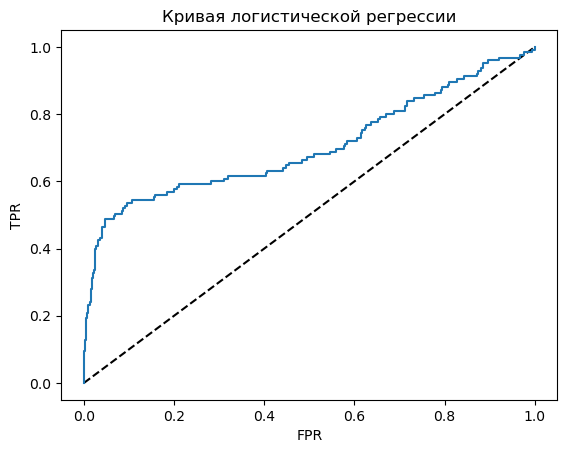

In [55]:
from sklearn.metrics import roc_curve
fpr, tpr, tresholds = roc_curve(y_test, y_pred_probs) 
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Кривая логистической регрессии')
plt.show()

In [56]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.7023977433004231


### Поиск по сетки кроссвалидации

In [58]:
import pandas as pd
import numpy as np
diabetes_df = pd.read_csv('diabetes_clean.csv')
diabetes_df = diabetes_df[diabetes_df['bmi']>0]
diabetes_df = diabetes_df[diabetes_df['glucose']>0]
diabetes_df = diabetes_df[diabetes_df['insulin']>0]
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose']

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=73)

In [76]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import Ridge
kf = KFold(n_splits=10, shuffle=True, random_state=73)
param_grid = {'alpha':np.linspace(0.0001, 1, 10), 'solver':['sag', 'lsqr']}
ridge = Ridge(max_iter=8000)
ridge_cv = GridSearchCV(ridge, param_grid=param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'sag'} 0.3964196397626586


In [63]:
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

0.3102902860693827


In [77]:
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=10, shuffle=True, random_state=73)
param_grid = {'alpha':np.linspace(0.0001, 1, 10), 'solver':['sag', 'lsqr']}
ridge = Ridge(max_iter=8000)
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=5)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'sag', 'alpha': 0.2223} 0.39636185256996015


### Классификационные деревья

In [78]:
from sklearn.tree import DecisionTreeClassifier
wbc = pd.read_csv('wbc.csv')
wbc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [82]:
X = wbc.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1).values
y = wbc['diagnosis'].values
print(X.shape, y.shape)

(569, 30) (569,)


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73, stratify=y)
dt = DecisionTreeClassifier(max_depth=2, random_state=73)

In [116]:
from sklearn.metrics import accuracy_score
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9035087719298246
